In [3]:
import warnings 
import tensorflow as tf 
import tensorflow.keras as keras
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

#verify the version of tensorflow in use
print (tf.__version__)

2.1.0


In [4]:
#data
dataset = pd.read_csv('../data/dog_data.csv')
print(dataset.head())
features = dataset.drop(['breed'],axis=1)
print(features[:5])

age  weight  height  breed
0  9.47    6.20    6.80      1
1  7.97    8.63    8.92      0
2  9.51    6.40    5.78      1
3  8.96    8.82    6.28      2
4  8.37    3.89    5.62      1
    age  weight  height
0  9.47    6.20    6.80
1  7.97    8.63    8.92
2  9.51    6.40    5.78
3  8.96    8.82    6.28
4  8.37    3.89    5.62


In [5]:
#preprocessing to create one hot vector. Earlier we used to do this using sklearn.preprocesing.oneHotEncoder
labels = np.array(dataset['breed'])
#onehot = tf.one_hot(labels, 3, on_value=None, off_value=None, axis=None, dtype=None, name=None)
#onehot = tf.one_hot(labels,3)
onehot = tf.keras.backend.one_hot(labels,3)
#print (tf.reduce_max(onehot,0))
print(onehot[:5])

tf.Tensor(
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]], shape=(5, 3), dtype=float32)


In [25]:
#train and test data
train_X = features.values[:160]
#train_Y= labels[:160]
train_Y = onehot[:160]
test_X = features.values[160:]
test_Y = onehot[160:]

#model  
model = keras.models.Sequential([
    #tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=4,input_shape=(3,),activation=tf.nn.relu),
    #tf.keras.layers.Dense(units=3,activation=tf.nn.relu),
    #tf.keras.layers.Dense(units=2, activation=tf.nn.relu),
    tf.keras.layers.Dense(3,activation=tf.nn.softmax)
])
print('Starting training')
model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
training_stats = model.fit(train_X, train_Y, batch_size = 1, epochs = 24, verbose = 1)

model.summary()


Starting training
Train on 160 samples
Epoch 1/24
160/160 [==============================] - 0s 2ms/sample - loss: 0.8465 - accuracy: 0.6875
Epoch 2/24
160/160 [==============================] - 0s 868us/sample - loss: 0.3723 - accuracy: 0.8438
Epoch 3/24
160/160 [==============================] - 0s 825us/sample - loss: 0.2647 - accuracy: 0.9062
Epoch 4/24
160/160 [==============================] - 0s 834us/sample - loss: 0.2216 - accuracy: 0.9312
Epoch 5/24
160/160 [==============================] - 0s 821us/sample - loss: 0.1736 - accuracy: 0.9375
Epoch 6/24
160/160 [==============================] - 0s 820us/sample - loss: 0.1843 - accuracy: 0.9438
Epoch 7/24
160/160 [==============================] - 0s 799us/sample - loss: 0.2083 - accuracy: 0.9312
Epoch 8/24
160/160 [==============================] - 0s 810us/sample - loss: 0.1779 - accuracy: 0.9375
Epoch 9/24
160/160 [==============================] - 0s 925us/sample - loss: 0.1663 - accuracy: 0.9375
Epoch 10/24
160/160 [======

In [26]:
print('Training finished')
print('Training Evaluation: loss = %0.3f, accuracy = %0.2f%%'
      %(training_stats.history['loss'][-1], 100 * training_stats.history['accuracy'][-1]))

Training finished
Training Evaluation: loss = 0.136, accuracy = 95.63%


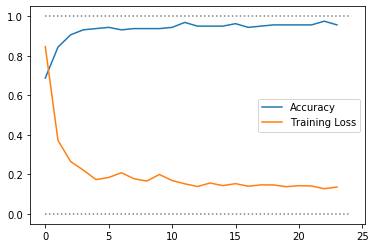

In [27]:
accuracy, = plt.plot(training_stats.history['accuracy'],label = 'Accuracy')
training_loss, = plt.plot(training_stats.history['loss'],label = 'Training Loss')


plt.legend(handles = [accuracy,training_loss])
loss = np.array(training_stats.history['loss'])
xp = np.linspace(0, loss.shape[0], 10 * loss.shape[0])
plt.plot(xp, np.full(xp.shape, 1), c = 'k', linestyle = ':', alpha = 0.5)
plt.plot(xp, np.full(xp.shape, 0), c = 'k', linestyle = ':', alpha = 0.5)
plt.show()

In [28]:

evaluation = model.evaluate(test_X, test_Y, verbose=1)
print('Test Set Evaluation: loss = %0.6f, accuracy = %0.2f' %(evaluation[0], 100*evaluation[1]))

40/40 [==============================] - 0s 2ms/sample - loss: 0.3595 - accuracy: 0.9500
Test Set Evaluation: loss = 0.359534, accuracy = 95.00


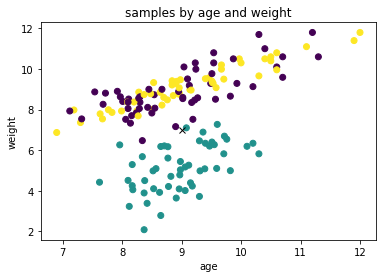

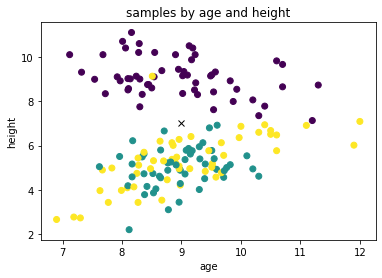

In [22]:
new_sample = [9, 7, 7]
plt.plot(new_sample[0], new_sample[1], 'ko', marker='x')
###

plt.scatter(train_X[:,0], train_X[:,1], c = labels[:160])
plt.title('samples by age and weight')
plt.xlabel('age')
plt.ylabel('weight')
plt.show()


plt.plot(new_sample[0], new_sample[2], 'ko', marker='x')


plt.scatter(train_X[:,0], train_X[:,2], c = labels[:160])
plt.title('samples by age and height')
plt.xlabel('age')
plt.ylabel('height')
plt.show()

In [29]:

predicted = model.predict(np.array([new_sample]))
print('Breed prediction for %s: ' %(new_sample))
print(predicted)
###

print(np.around(predicted[0],2))
print('Breed %s, with %i%% certainty.' %(np.argmax(predicted), np.round(100 * predicted[:, np.argmax(predicted)][0])))

Breed prediction for [9, 7, 7]: 
[[0.02278103 0.9609701  0.01624879]]
[0.02 0.96 0.02]
Breed 1, with 96% certainty.
